In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataSetOfLungCancer/Lung_Cancer/Train70',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataSetOfLungCancer/Lung_Cancer/Validation10',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DataSetOfLungCancer/Lung_Cancer/Test20',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 10537 images belonging to 3 classes.
Found 1504 images belonging to 3 classes.
Found 3013 images belonging to 3 classes.


In [ ]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False, 
    weights = 'imagenet', 
    input_shape=(224,224,3),
    )

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
VGG16.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'), 
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 40,932,163
Trainable params: 26,217,475
No

In [ ]:
history = model.fit(
    x = train, 
    validation_data = validation,
    epochs = 15
)

Epoch 1/15
330/330 [==============================] - 5861s 18s/step - loss: 0.3736 - accuracy: 0.8760 - val_loss: 0.1227 - val_accuracy: 0.9614
Epoch 2/15
330/330 [==============================] - 225s 680ms/step - loss: 0.1996 - accuracy: 0.9195 - val_loss: 0.1174 - val_accuracy: 0.9608
Epoch 3/15
330/330 [==============================] - 223s 677ms/step - loss: 0.1807 - accuracy: 0.9270 - val_loss: 0.0979 - val_accuracy: 0.9654
Epoch 4/15
330/330 [==============================] - 225s 681ms/step - loss: 0.1717 - accuracy: 0.9323 - val_loss: 0.1205 - val_accuracy: 0.9508
Epoch 5/15
330/330 [==============================] - 226s 685ms/step - loss: 0.1665 - accuracy: 0.9348 - val_loss: 0.0992 - val_accuracy: 0.9561
Epoch 6/15
330/330 [==============================] - 225s 680ms/step - loss: 0.1567 - accuracy: 0.9360 - val_loss: 0.0876 - val_accuracy: 0.9628
Epoch 7/15
330/330 [==============================] - 224s 678ms/step - loss: 0.1511 - accuracy: 0.9384 - val_loss: 0.0877 - 

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

95/95 [==============================] - 2035s 22s/step - loss: 0.0722 - accuracy: 0.9708
Accuracy: 0.9707932472229004
Loss: 0.07216150313615799


In [ ]:
test.class_indices

{'Lung-Benign_Tissue': 0,
 'Lung_Adenocarcinoma': 1,
 'Lung_Squamous_Cell_Carcinoma': 2}

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinomae']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

95/95 [==============================] - 32s 335ms/step
                               precision    recall  f1-score   support

           Lung-Benign_Tissue       1.00      1.00      1.00      1013
          Lung_Adenocarcinoma       0.94      0.97      0.96      1000
Lung_Squamous_Cell_Carcinomae       0.97      0.94      0.96      1000

                     accuracy                           0.97      3013
                    macro avg       0.97      0.97      0.97      3013
                 weighted avg       0.97      0.97      0.97      3013



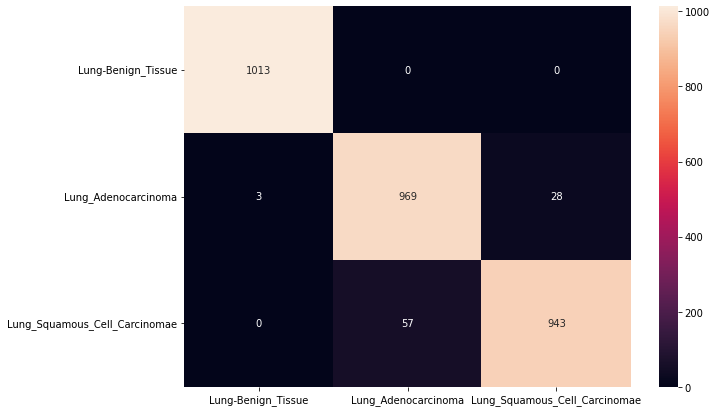

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinomae']],
                  columns = [i for i in ['Lung-Benign_Tissue', 'Lung_Adenocarcinoma', 'Lung_Squamous_Cell_Carcinomae']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

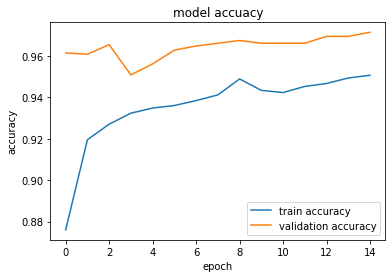

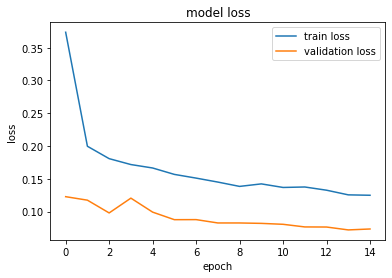

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()